# Solving the N-Puzzle Problem 

The objective of this exercise is the application of search methods, with emphasis on informed search methods and the A* algorithm, to solve the well-known N-Puzzle problem. The desired objective state for the puzzle is as follows (0 represents the empty space):

### 9Puzzle
||
- | - | -
1 | 2 | 3
4 | 5 | 6
7 | 8 | 0

### 16Puzzle
|||
- | - | - | -
1 | 2 | 3 | 4
5 | 6 | 7 | 8
9 | 10 | 11 | 12
13 | 14 | 15 | 16

Starting from a given initial state, the goal is to determine which operations to perform to solve the puzzle, reaching the desired objective state. 

- a) Formulate the problem as a search problem indicating the state representation, operators (their names, preconditions, effects, and cost), initial state, and objective test. 
- b) Implement code to solve this problem using the “breath-first” strategy (in this case identical to "Uniform Cost"). 
- c) Implement code to solve this problem using Greedy Search and using the A* Algorithm. Suppose the following heuristics for these methods: H1 - Number of incorrected placed pieces; H2 - Sum of manhattan distances from incorrected placed pieces to their correct places. 
- d) Compare the results obtained concerning execution time and memory space occupied in solving the following problems using the previous methods:

### Prob1
||
- | - | -
1 | 2 | 3
5 | 0 | 6
4 | 7 | 8

### Prob2
||
- | - | -
1 | 3 | 6
5 | 2 | 0
4 | 7 | 8

### Prob3
||
- | - | -
1 | 6 | 2
5 | 7 | 3
0 | 4 | 8

### Prob4
|||
- | - | - | -
5 | 1 | 3 | 4
10 | 6 | 11 | 12
9 | 13 | 14 | 15


## a)

### State Representation

- Matrix B\[N, N\], with all different values in 0 .. N*N-1, where N is the side of the square, and 0 represents the empty square
- (Xs, Ys), the X and Y of the empty square

### Initial State

- Matrix filled, depedently
- (Xs, Ys) has the position of the empty square, where the top left is (0, 0)

### Objective State

- Matrix filled from left-right, top-bottom, with 0 in the last possible square

e.g., for N = 3:

||
- | - | -
1 | 2 | 3
4 | 5 | 6
7 | 8 | 0

### Operators

Name  | Preconditions | Effects
----- | ------------- | -------
up    | Ys > 0 | B\[Xs, Ys] = B\[Xs, Ys-1], B\[Xs, Ys-1] = 0, Ys--
down  | Ys < N - 1 | B\[Xs, Ys] = B\[Xs, Ys+1], B\[Xs, Ys+1] = 0, Ys++
left  | Xs > 0 | B\[Xs, Ys] = B\[Xs-1, Ys], B\[Xs-1, Ys] = 0, Xs--
right | Xs < N - 1 | B\[Xs, Ys] = B\[Xs+1, Ys], B\[Xs+1, Ys] = 0, Xs++

Cost is 1 for all operators

## b)

In [1]:
# operators
import copy
import sys
import sys
# sys.path is a list of absolute path strings
sys.path.append('../common')
from copy import copy
from search import bfs, a_star

class NPuzzleState:
    def __init__(self, board):
        self.board = [row[:] for row in board]
        (self.empty_x, self.empty_y) = NPuzzleState.empty_square(self.board)
        self.board_side = len(self.board)

    # gets the (x, y) of the empty square
    @staticmethod
    def empty_square(board):
        for y, line in enumerate(board):
            for x, element in enumerate(line):
                if element == 0:
                    return (x, y)

        return False

    def to_string(self):
        res = ""

        for list in self.board:
            for element in list:
                res += str(element) + " "
            res += "\n"

        return res

    def __eq__(self, other):
        if not isinstance(other, NPuzzleState):
            return False
        return self.board == other.board


def up(state):
    if state.empty_y <= 0:
        return False

    new_state = NPuzzleState(state.board)
    new_state.board[new_state.empty_y][new_state.empty_x] = new_state.board[new_state.empty_y - 1][new_state.empty_x]
    new_state.board[new_state.empty_y - 1][new_state.empty_x] = 0
    new_state.empty_y -= 1
    return new_state


def down(state):
    if state.empty_y >= state.board_side - 1:
        return False

    new_state = NPuzzleState(state.board)
    new_state.board[new_state.empty_y][new_state.empty_x] = new_state.board[new_state.empty_y + 1][new_state.empty_x]
    new_state.board[new_state.empty_y + 1][new_state.empty_x] = 0
    new_state.empty_y += 1
    return new_state


def left(state):
    if state.empty_x <= 0:
        return False

    new_state = NPuzzleState(state.board)

    new_state.board[new_state.empty_y][new_state.empty_x] = new_state.board[new_state.empty_y][new_state.empty_x - 1]
    new_state.board[new_state.empty_y][new_state.empty_x - 1] = 0
    new_state.empty_x -= 1
    return new_state


def right(state):
    if state.empty_x >= state.board_side - 1:
        return False

    new_state = NPuzzleState(state.board)

    new_state.board[new_state.empty_y][new_state.empty_x] = new_state.board[new_state.empty_y][new_state.empty_x + 1]
    new_state.board[new_state.empty_y][new_state.empty_x + 1] = 0
    new_state.empty_x += 1
    return new_state


functions = [up, down, left, right]


def h1(state):
    res = 0
    for i in range(state.board_side):
        for j in range(state.board_side):
            if state.board[i][j] != 0 or state.board[i][j] != i*state.board_side + j + 1:
                res += 1

    return res


def h2(state):
    res = 0
    for i in range(state.board_side):
        for j in range(state.board_side):
            if state.board[i][j] != 0 and state.board[i][j] != i*state.board_side + j + 1:
                res += abs(i - (state.board[i][j] - 1) // state.board_side) + \
                    abs(j - (state.board[i][j] - 1) % state.board_side)

    return res


def objective(state):
    flat_list = []
    for sublist in state.board:
        for item in sublist:
            flat_list.append(item)

    return (all(i < j for i, j in zip(flat_list[:len(flat_list) - 2], flat_list[1:len(flat_list) - 1]))) and flat_list[0] == 1


In [2]:
# b
# solves using breadth first search

initial_state = NPuzzleState([[1, 2, 3],
                            [5, 0, 6],
                            [4, 7, 8]])

res = bfs(initial_state, functions, objective)
print(res)

 |
 | start
 v
1 2 3 
5 0 6 
4 7 8 
 |
 | left
 v
1 2 3 
0 5 6 
4 7 8 
 |
 | down
 v
1 2 3 
4 5 6 
0 7 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 0 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 8 0 

weight: 4


In [3]:
# c
# solves using A*
initial_state = NPuzzleState([[1, 2, 3],
                            [5, 0, 6],
                            [4, 7, 8]])

res = a_star(initial_state, functions, objective, h1)
print(res)

 |
 | start
 v
1 2 3 
5 0 6 
4 7 8 
 |
 | left
 v
1 2 3 
0 5 6 
4 7 8 
 |
 | down
 v
1 2 3 
4 5 6 
0 7 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 0 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 8 0 

weight: 4


In [4]:
initial_state = NPuzzleState([[1, 2, 3],
                            [5, 0, 6],
                            [4, 7, 8]])

res = a_star(initial_state, functions, objective, h1)
print(res)

 |
 | start
 v
1 2 3 
5 0 6 
4 7 8 
 |
 | left
 v
1 2 3 
0 5 6 
4 7 8 
 |
 | down
 v
1 2 3 
4 5 6 
0 7 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 0 8 
 |
 | right
 v
1 2 3 
4 5 6 
7 8 0 

weight: 4


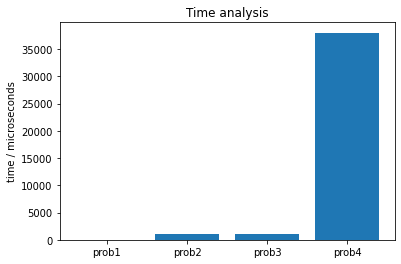

In [5]:
# d
import matplotlib.pyplot as plt
from datetime import datetime

# prob1
start = datetime.now()
initial_state = NPuzzleState([[1, 2, 3],
                            [5, 0, 6],
                            [4, 7, 8]])
a_star(initial_state, functions, objective, h2)                            
time1 = (datetime.now() - start).microseconds

#prob2
start = datetime.now()
initial_state = NPuzzleState([[1, 3, 6],
                            [5, 2, 0],
                            [4, 7, 8]])
a_star(initial_state, functions, objective, h2)
time2 = (datetime.now() - start).microseconds

#prob3
start = datetime.now()
initial_state = NPuzzleState([[1, 6, 2],
                            [5, 7, 3],
                            [0, 4, 8]])
a_star(initial_state, functions, objective, h2)
time3 = (datetime.now() - start).microseconds

#prob4
start = datetime.now()
initial_state = NPuzzleState([[5, 1, 3, 4],
                            [2, 0, 7, 8],
                            [10, 6, 11, 12],
                            [9, 13, 14, 15]])
a_star(initial_state, functions, objective, h2)
time4 = (datetime.now() - start).microseconds

plt.bar(["prob1", "prob2", "prob3", "prob4"], [time1, time2, time3, time4])
plt.title("Time analysis")
plt.ylabel("time / microseconds")
plt.show()